In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = load_iris()
df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target
df.target.unique()
df = df[df['target'].isin([1,0])]
df.target.unique()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  100 non-null    float64
 1   sepal width (cm)   100 non-null    float64
 2   petal length (cm)  100 non-null    float64
 3   petal width (cm)   100 non-null    float64
 4   target             100 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 4.7 KB


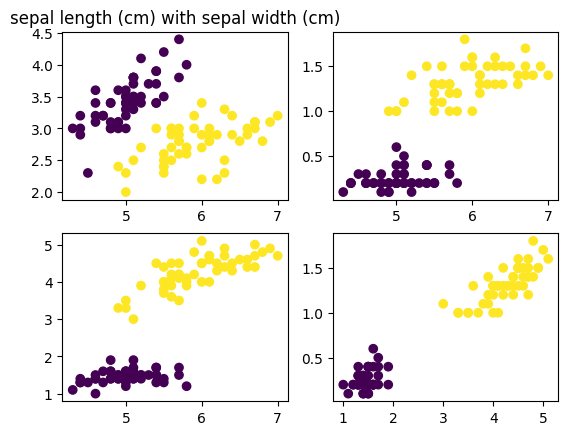

In [4]:
fig, axs = plt.subplots(2,2)
axs[0, 0].scatter(df['sepal length (cm)'], df['sepal width (cm)' ], c = df['target'])
axs[0, 0].set_title('sepal length (cm) with sepal width (cm)')
axs[1, 1].scatter(df['petal length (cm)'], df['petal width (cm)' ], c = df['target'])
axs[0, 1].scatter(df['sepal length (cm)'], df['petal width (cm)' ], c = df['target'])
axs[1, 0].scatter(df['sepal length (cm)'], df['petal length (cm)' ], c = df['target'])

plt.show()

In [5]:
x_train, x_test, y_train, y_test = train_test_split(df[df.columns[:-1]], df[df.columns[-1]],
                                                    test_size=0.2, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

1.0


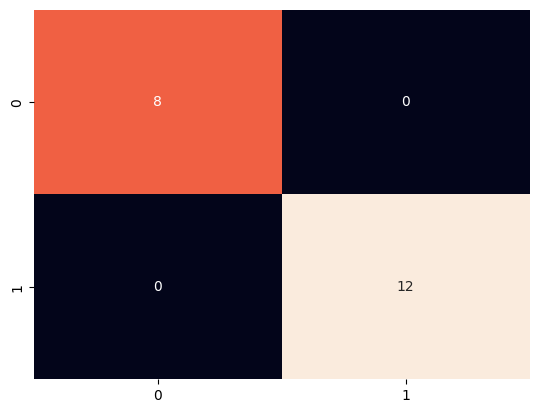

In [6]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
class_report = classification_report(y_test, y_pred)
print(class_report)
print(accuracy_score(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, cbar=False)
plt.savefig('conf.jpeg')